In [3]:
import os
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
data_path = '/shared/0/projects/cross-lingual-exchange/data/dataframes/'
lang_abbrevs = {}
lang_abbrevs['de'] = 'German'
lang_abbrevs['pl'] = 'Polish'
lang_abbrevs['tr'] = 'Turkish'
lang_abbrevs['en'] = 'English'
lang_abbrevs['es'] = 'Spanish'
lang_abbrevs['pt'] = 'Portuguese'
language_pairs = [('de','pl'),('de','tr'),('es','pt')]

In [6]:
all_dfs = []
for pair in language_pairs:
    data_file = os.path.join(data_path,f'{pair[0]}_{pair[1]}.tsv')
    df = pd.read_csv(data_file,sep='\t',header=None)
    df.columns = ['user_id','lang','bilinguality','country','betw','num_tweets','followers',
    'following','hashtag_count','url_count','degree']
    df['lang1'] = pair[0]
    df['lang2'] = pair[1]
    all_dfs.append(df)
    



In [7]:
df = pd.concat(all_dfs).reset_index()

In [8]:
df.loc[df['lang'] =='BI', 'mono_vs_bi'] = 'bilingual'
df.loc[df['lang'] != 'BI', 'mono_vs_bi'] = 'monolingual'

In [37]:
df1 = df[(df['lang1'] != 'en') & (df['num_tweets'] > 5)] 

In [38]:
df1

,index,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree,lang1,lang2,mono_vs_bi
0,0,1897881824,de,1.000000,Germany,2.690862e-09,10,210,55,0,1,3,de,pl,monolingual
1,1,94898865,de,1.000000,Germany,8.210688e-06,39,1033,643,0,7,21,de,pl,monolingual
2,2,569336210,de,1.000000,Germany,2.925721e-06,116,185,176,0,22,29,de,pl,monolingual
3,3,2337227562,de,1.000000,Germany,1.038108e-04,77,405,259,6,11,48,de,pl,monolingual
4,4,569302954,pl,0.000000,Poland,1.655331e-05,12,454,1444,0,10,3,de,pl,monolingual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490914,591860,463701575,pt,0.000000,Portugal,1.901971e-06,33,1552,943,3,8,24,es,pt,monolingual
1490915,591861,2147517722,BI,0.059574,Portugal,7.890509e-09,235,979,359,1,25,16,es,pt,bilingual
1490918,591864,1854615883,BI,0.067797,Portugal,5.292773e-09,59,235,456,0,4,6,es,pt,bilingual
1490919,591865,28083,BI,0.023256,Portugal,9.502142e-07,86,1092,305,1,25,36,es,pt,bilingual


In [39]:
len(set(df1['user_id']))

959627

In [40]:
pd.DataFrame(df[df['lang1'] != 'en'].groupby(['lang1','lang2','country','lang']).agg('count')['user_id'])

user_id
lang1 lang2 country  lang         
de    pl    Germany  BI        807
                     de      31287
                     pl         40
            Poland   BI       3783
                     de        442
                     pl     101485
      tr    Germany  BI       1326
                     de      30950
                     tr        739
            Turkey   BI      15151
                     de        219
                     tr     605335
es    pt    Portugal BI      24140
                     es        887
                     pt      17935
            Spain    BI     103435
                     es     442220
                     pt       3251

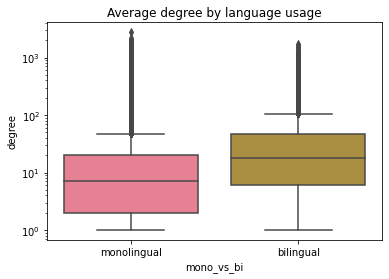

In [58]:
sns.boxplot(x='mono_vs_bi',y='degree',data=df1)
plt.title('Average degree by language usage')
plt.yscale('log')

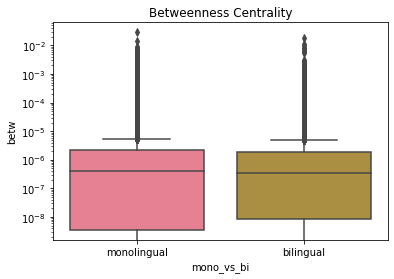

In [57]:
sns.set_palette('husl')
sns.boxplot(x='mono_vs_bi',y='betw',data=df1)
plt.title('Betweenness Centrality')
plt.yscale('log')
#bilinguals (of any language) vs monolinguals of different languages

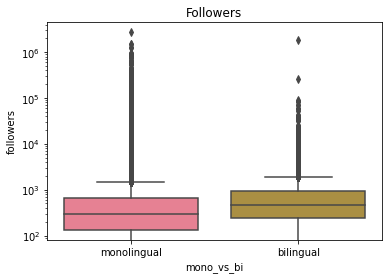

In [59]:
sns.boxplot(x='mono_vs_bi',y='followers',data=df1)
plt.title('Followers')
plt.yscale('log')

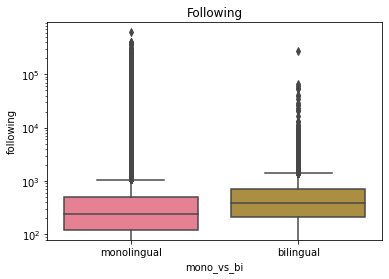

In [60]:
sns.boxplot(x='mono_vs_bi',y='following',data=df)
plt.title('Following')
plt.yscale('log')

In [49]:
df2 = pd.melt(df1,id_vars=['index','user_id','lang','bilinguality','country','lang1','lang2','mono_vs_bi'],
             value_vars=['betw','num_tweets','followers','following','hashtag_count','url_count','degree'])

In [61]:
df1

,index,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree,lang1,lang2,mono_vs_bi
0,0,1897881824,de,1.000000,Germany,2.690862e-09,10,210,55,0,1,3,de,pl,monolingual
1,1,94898865,de,1.000000,Germany,8.210688e-06,39,1033,643,0,7,21,de,pl,monolingual
2,2,569336210,de,1.000000,Germany,2.925721e-06,116,185,176,0,22,29,de,pl,monolingual
3,3,2337227562,de,1.000000,Germany,1.038108e-04,77,405,259,6,11,48,de,pl,monolingual
4,4,569302954,pl,0.000000,Poland,1.655331e-05,12,454,1444,0,10,3,de,pl,monolingual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490914,591860,463701575,pt,0.000000,Portugal,1.901971e-06,33,1552,943,3,8,24,es,pt,monolingual
1490915,591861,2147517722,BI,0.059574,Portugal,7.890509e-09,235,979,359,1,25,16,es,pt,bilingual
1490918,591864,1854615883,BI,0.067797,Portugal,5.292773e-09,59,235,456,0,4,6,es,pt,bilingual
1490919,591865,28083,BI,0.023256,Portugal,9.502142e-07,86,1092,305,1,25,36,es,pt,bilingual


In [ ]:
# monolingual germans vs bilingual german/turkish vs monolingual turkish 
# separate by in germany vs in turkey

In [54]:
# for each language pair 
# monolingual germans vs bilingual german/turkish vs monolingual turkish 
# monolingual german vs bilingual german/polish vs monolingual polish

df[df['lang']=='pt']

,index,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree,lang1,lang2,mono_vs_bi
899419,365,1390470768,pt,0.0,Spain,4.232360e-09,2,834,524,0,1,14,es,pt,monolingual
899427,373,463175344,pt,0.0,Spain,7.321351e-08,20,218,200,0,20,16,es,pt,monolingual
899817,763,462874840,pt,0.0,Spain,1.634605e-06,9,402,277,0,9,56,es,pt,monolingual
899997,943,462728785,pt,0.0,Spain,8.880849e-07,7,339,334,0,7,34,es,pt,monolingual
900026,972,462708801,pt,0.0,Spain,1.191815e-07,20,425,1027,0,20,28,es,pt,monolingual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490910,591856,73183,pt,0.0,Portugal,0.000000e+00,4,192,261,0,0,2,es,pt,monolingual
1490912,591858,72473,pt,0.0,Portugal,0.000000e+00,6,2414,332,0,0,6,es,pt,monolingual
1490914,591860,463701575,pt,0.0,Portugal,1.901971e-06,33,1552,943,3,8,24,es,pt,monolingual
1490917,591863,2147516753,pt,0.0,Portugal,3.149599e-07,4,206,157,0,0,4,es,pt,monolingual


Text(0.5, 1.0, 'following count')

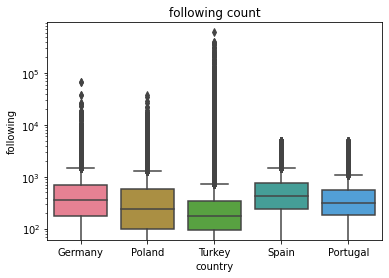

In [72]:
# comparison of monolinguals across languages
sns.boxplot(x='country',y='following',data=df1)
plt.yscale('log')
plt.title('following count')

Text(0.5, 1.0, 'Degree of German and Turkish speakers')

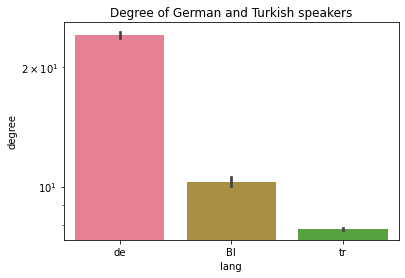

In [93]:
sns.barplot(x='lang',y='degree',data=df1[(df1['lang1'] == 'de') & (df1['lang2'] == 'tr')])
plt.yscale('log')
#plt.ylim((1e-6,1e-5))
plt.title('Degree of German and Turkish speakers')

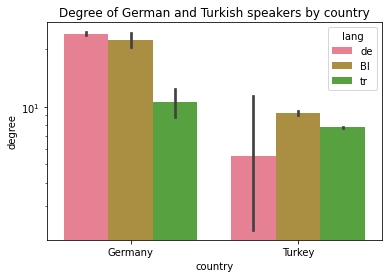

In [96]:
sns.barplot(x='country',y='degree',data=df1[(df1['lang1'] == 'de') & (df1['lang2'] == 'tr')],hue='lang')
plt.title('Degree of German and Turkish speakers by country')
plt.yscale('log')


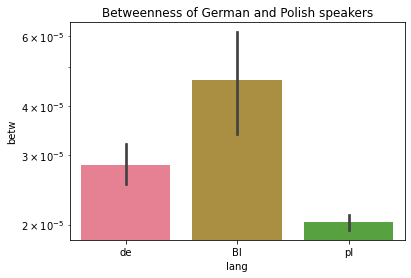

In [101]:
sns.barplot(x='lang',y='betw',data=df1[(df1['lang1'] == 'de') & (df1['lang2'] == 'pl')],order=['de','BI','pl'])
plt.title('Betweenness of German and Polish speakers')
plt.yscale('log')

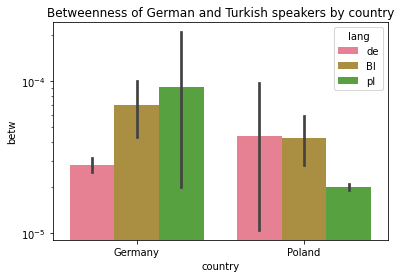

In [99]:
sns.barplot(x='country',y='betw',data=df1[(df1['lang1'] == 'de') & (df1['lang2'] == 'pl')],hue='lang',hue_order=['de','BI','pl'])
plt.title('Betweenness of German and Polish speakers by country')
plt.yscale('log')

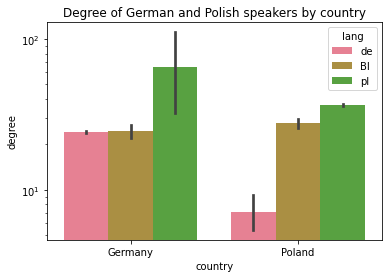

In [100]:
sns.barplot(x='country',y='degree',data=df1[(df1['lang1'] == 'de') & (df1['lang2'] == 'pl')],hue='lang',hue_order=['de','BI','pl'])
plt.title('Degree of German and Polish speakers by country')
plt.yscale('log')

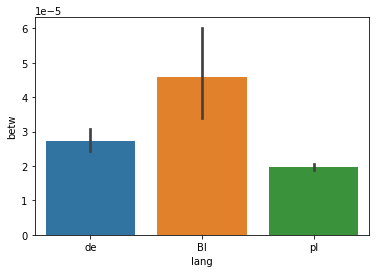

In [81]:
sns.barplot(x='lang',y='betw',data=df1[(df1['lang1'] == 'de') & (df1['lang2'] == 'pl')],order=['de','BI','pl'])

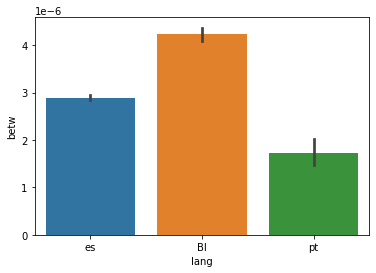

In [84]:

sns.barplot(x='lang',y='betw',data=df1[(df1['lang1'] == 'es') & (df1['lang2'] == 'pt')])

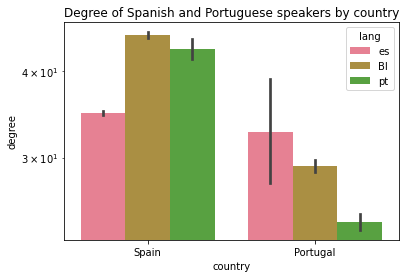

In [105]:
#sns.barplot(x='lang',y='betw',data=df1[(df1['lang1'] == 'es') & (df1['lang2'] == 'pt')],hue='country')
sns.barplot(x='country',y='degree',data=df1[(df1['lang1'] == 'es') & (df1['lang2'] == 'pt')],hue='lang',hue_order=['es','BI','pt'])
plt.title('Degree of Spanish and Portuguese speakers by country')
plt.yscale('log')

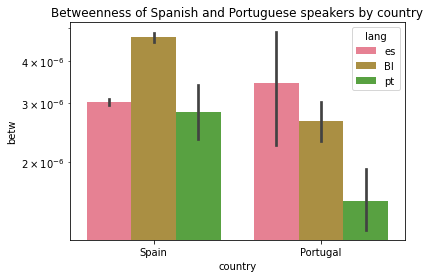

In [106]:
sns.barplot(x='country',y='betw',data=df1[(df1['lang1'] == 'es') & (df1['lang2'] == 'pt')],hue='lang',hue_order=['es','BI','pt'])
plt.title('Betweenness of Spanish and Portuguese speakers by country')
plt.yscale('log')

In [107]:
df1

,index,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree,lang1,lang2,mono_vs_bi
0,0,1897881824,de,1.000000,Germany,2.690862e-09,10,210,55,0,1,3,de,pl,monolingual
1,1,94898865,de,1.000000,Germany,8.210688e-06,39,1033,643,0,7,21,de,pl,monolingual
2,2,569336210,de,1.000000,Germany,2.925721e-06,116,185,176,0,22,29,de,pl,monolingual
3,3,2337227562,de,1.000000,Germany,1.038108e-04,77,405,259,6,11,48,de,pl,monolingual
4,4,569302954,pl,0.000000,Poland,1.655331e-05,12,454,1444,0,10,3,de,pl,monolingual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490914,591860,463701575,pt,0.000000,Portugal,1.901971e-06,33,1552,943,3,8,24,es,pt,monolingual
1490915,591861,2147517722,BI,0.059574,Portugal,7.890509e-09,235,979,359,1,25,16,es,pt,bilingual
1490918,591864,1854615883,BI,0.067797,Portugal,5.292773e-09,59,235,456,0,4,6,es,pt,bilingual
1490919,591865,28083,BI,0.023256,Portugal,9.502142e-07,86,1092,305,1,25,36,es,pt,bilingual


In [111]:
df1.loc[(df1['bilinguality'] == 0),'lang_prop'] = 'only lang2'
df1.loc[(df1['lang'] =='BI') & (df1['bilinguality'] <= 0.2),'lang_prop'] = '>=80% lang2'
df1.loc[(df1['lang'] =='BI') & (df1['bilinguality'] > 0.2) & (df1['bilinguality'] <= 0.4),'lang_prop'] = '60-80% lang2'
df1.loc[(df1['lang'] =='BI') & (df1['bilinguality'] > 0.4) & (df1['bilinguality'] < 0.6),'lang_prop'] = 'roughly even'
df1.loc[(df1['lang'] =='BI') & (df1['bilinguality'] >= 0.6) & (df1['bilinguality'] < 0.8),'lang_prop'] = '60-80% lang1'
df1.loc[(df1['lang'] =='BI') & (df1['bilinguality'] >= 0.8),'lang_prop'] = '>=80% lang1'
df1.loc[(df1['bilinguality'] == 1),'lang_prop'] = 'only lang1'


In [112]:
df1

,index,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree,lang1,lang2,mono_vs_bi,lang_prop
0,0,1897881824,de,1.000000,Germany,2.690862e-09,10,210,55,0,1,3,de,pl,monolingual,only lang1
1,1,94898865,de,1.000000,Germany,8.210688e-06,39,1033,643,0,7,21,de,pl,monolingual,only lang1
2,2,569336210,de,1.000000,Germany,2.925721e-06,116,185,176,0,22,29,de,pl,monolingual,only lang1
3,3,2337227562,de,1.000000,Germany,1.038108e-04,77,405,259,6,11,48,de,pl,monolingual,only lang1
4,4,569302954,pl,0.000000,Poland,1.655331e-05,12,454,1444,0,10,3,de,pl,monolingual,only lang2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490914,591860,463701575,pt,0.000000,Portugal,1.901971e-06,33,1552,943,3,8,24,es,pt,monolingual,only lang2
1490915,591861,2147517722,BI,0.059574,Portugal,7.890509e-09,235,979,359,1,25,16,es,pt,bilingual,>=80% lang2
1490918,591864,1854615883,BI,0.067797,Portugal,5.292773e-09,59,235,456,0,4,6,es,pt,bilingual,>=80% lang2
1490919,591865,28083,BI,0.023256,Portugal,9.502142e-07,86,1092,305,1,25,36,es,pt,bilingual,>=80% lang2


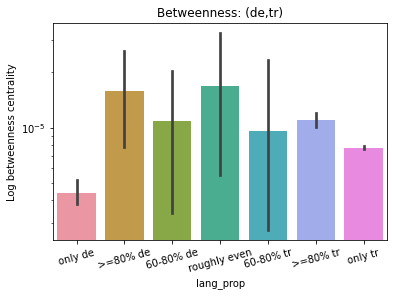

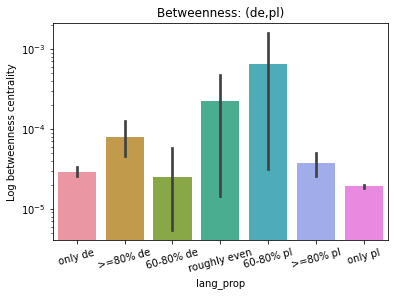

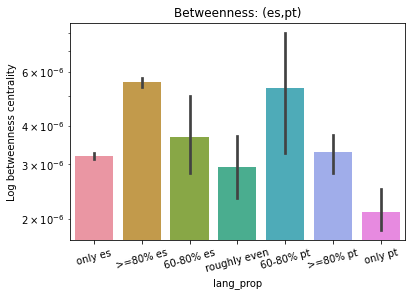

In [145]:
for (l1,l2) in [('de','tr'),('de','pl'),('es','pt')]:
    sns.barplot(x='lang_prop',y='betw',data=df1[(df1['betw'] > 0) & (df1['lang1'] == l1) & (df1['lang2'] == l2)],
                order=[f'only lang1',f'>=80% lang1',f'60-80% lang1',
                       f'roughly even',f'60-80% lang2',f'>=80% lang2',f'only lang2'],
                )
    plt.title(f'Betweenness: ({l1},{l2})')
    plt.yscale('log')
    plt.xticks(rotation=15)
    plt.ylabel('Log betweenness centrality')
    plt.xticks(range(7),[f'only {l1}',f'>=80% {l1}',f'60-80% {l1}',
                       f'roughly even',f'60-80% {l2}',f'>=80% {l2}',f'only {l2}'])
    plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

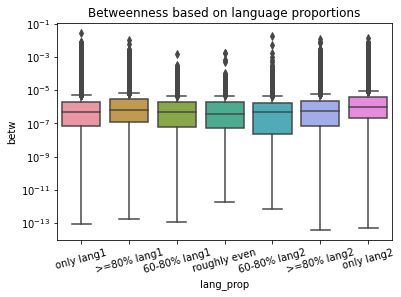

In [125]:
sns.boxplot(x='lang_prop',y='betw',data=df1[df1['betw'] > 0],
            order=['only lang1','>=80% lang1','60-80% lang1','roughly even','60-80% lang2','>=80% lang2','only lang2'])
plt.title('Betweenness based on language proportions')
plt.yscale('log')
plt.xticks(rotation=15)

In [121]:
df1[df1['lang_prop'] == '60-80% lang2']

,index,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree,lang1,lang2,mono_vs_bi,lang_prop
9178,9178,125707335,BI,0.250000,Poland,4.060000e-06,8,105,243,0,6,7,de,pl,bilingual,60-80% lang2
15948,15948,77705250,BI,0.268456,Germany,5.488679e-03,149,1098,974,53,25,154,de,pl,bilingual,60-80% lang2
20069,20069,243151113,BI,0.400000,Germany,3.972001e-06,10,1329,2047,0,0,2,de,pl,bilingual,60-80% lang2
20214,20214,2200116367,BI,0.311111,Poland,4.664374e-04,90,712,459,10,88,21,de,pl,bilingual,60-80% lang2
37143,37143,3317711980,BI,0.322129,Poland,1.140122e-04,357,67,107,0,158,45,de,pl,bilingual,60-80% lang2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490349,591295,1861055929,BI,0.365854,Portugal,0.000000e+00,82,579,339,23,26,2,es,pt,bilingual,60-80% lang2
1490592,591538,2455429591,BI,0.333333,Portugal,0.000000e+00,6,158,173,0,0,2,es,pt,bilingual,60-80% lang2
1490636,591582,466727543,BI,0.250000,Portugal,3.149599e-07,8,129,63,0,1,6,es,pt,bilingual,60-80% lang2
1490642,591588,1857605706,BI,0.214286,Portugal,1.488859e-07,14,269,156,0,1,32,es,pt,bilingual,60-80% lang2


Text(0.5, 1.0, 'Correlation between degree and betweenness (log-log)')

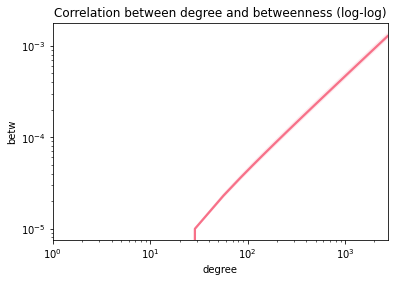

In [152]:
sns.regplot(x='degree',y='betw',data=df1,scatter=False)
plt.yscale('log')
plt.xscale('log')
plt.title('Correlation between degree and betweenness (log-log)')

In [154]:
from scipy.stats import pearsonr


In [155]:

pearsonr(df1['degree'], df1['betw'])

(0.29985124343632896, 0.0)

In [156]:
pearsonr(df1[df1['country']=='Germany']['degree'], df1[df1['country']=='Germany']['betw'])

(0.21128647204659845, 0.0)

In [157]:
pearsonr(df1[df1['country']=='Turkey']['degree'], df1[df1['country']=='Turkey']['betw'])

(0.6602955960725961, 0.0)

In [158]:
pearsonr(df1[df1['country']=='Poland']['degree'], df1[df1['country']=='Poland']['betw'])

(0.44805971859214117, 0.0)

In [ ]:
pearsonr(df1[df1['country']=='Spain']['degree'], df1[df1['country']=='Poland']['betw'])

for country in ['Germany','Turkey','Poland','Spain','Portugal']:
    print(f'{country}' ')
    

In [14]:
df

,user_id,lang,bilinguality,country,betw,num_tweets,followers,following,hashtag_count,url_count,degree,lang1,lang2,mono_vs_bi
0,1897881824,de,1.000000,Germany,2.690862e-09,10,210,55,0,1,3,de,pl,monolingual
1,94898865,de,1.000000,Germany,8.210688e-06,39,1033,643,0,7,21,de,pl,monolingual
2,569336210,de,1.000000,Germany,2.925721e-06,116,185,176,0,22,29,de,pl,monolingual
3,2337227562,de,1.000000,Germany,1.038108e-04,77,405,259,6,11,48,de,pl,monolingual
4,569302954,pl,0.000000,Poland,1.655331e-05,12,454,1444,0,10,3,de,pl,monolingual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383427,2147516753,pt,0.000000,Portugal,3.149599e-07,4,206,157,0,0,4,es,pt,monolingual
1383428,1854615883,BI,0.067797,Portugal,5.292773e-09,59,235,456,0,4,6,es,pt,bilingual
1383429,28083,BI,0.023256,Portugal,9.502142e-07,86,1092,305,1,25,36,es,pt,bilingual
1383430,2147509249,BI,0.083333,Portugal,2.853678e-10,12,704,632,0,3,14,es,pt,bilingual


In [17]:
df1 = df.drop(columns=['lang','user_id','country','lang1','lang2','bilinguality'])

In [19]:
df1.to_csv('/shared/2/projects/cross-lingual-exchange/data/prelim_datasheet.tsv',sep='\t')